Project: Analysis of Traffic Accidents Dataset
We'll use the US Accident Dataset from Kaggle, which includes information about traffic accidents across the United States. Here's how we can structure the project based on the dataset.

Dataset Overview
We'll focus on analyzing the following variables:

Start_Time: The timestamp when the accident occurred.
Weather_Condition: The weather condition at the time of the accident.
Road_Condition: The condition of the road surface.
Latitude: The latitude of the accident location.
Longitude: The longitude of the accident location.
Severity: The severity of the accident.

In [ ]:
!pip install pandas seaborn matplotlib folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


#Load and Preprocess the Data

We’ll start by loading the dataset and preprocessing it (handling missing values and converting necessary columns).

In [5]:
import pandas as pd
import numpy as np

# Define the path to your CSV file
file_path = r"C:\Users\varun\Desktop\PRODIGY\Prodigy T3\US_Accidents_March23.csv"

# Define the number of rows to sample
sample_size = 1000  # Change this to the desired sample size

# First, read the header
header = pd.read_csv(file_path, nrows=0).columns.tolist()

# Count the total number of rows in the CSV file (excluding header)
total_rows = sum(1 for _ in open(file_path)) - 1  # Subtract 1 for the header

# Generate random row indices to sample
random_indices = np.random.choice(total_rows, sample_size, replace=False)

# Load the sampled rows using the skiprows parameter
df_sampled = pd.read_csv(file_path, skiprows=lambda x: x not in random_indices + 1, header=None)

# Add the header to the DataFrame
df_sampled.columns = header

# Check the size of the sampled dataframe
print(f"Sampled dataset size: {df_sampled.shape[0]}")

# Display the first few rows of the sampled DataFrame
print(df_sampled.head())


Sampled dataset size: 1000
        ID   Source  Severity           Start_Time             End_Time  \
0  A-14642  Source2         2  2016-11-02 14:24:10  2016-11-02 14:53:44   
1  A-19468  Source2         2  2016-11-30 15:54:16  2016-11-30 16:37:51   
2  A-19635  Source2         2  2016-09-12 19:29:45  2016-09-12 20:00:00   
3  A-22444  Source2         3  2016-09-29 10:22:22  2016-09-29 11:06:46   
4  A-40155  Source2         3  2016-05-27 10:16:11  2016-05-27 10:46:11   

   Start_Lat   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  36.742023 -121.773849      NaN      NaN          0.01  ...      False   
1  38.362251 -120.733673      NaN      NaN          0.01  ...      False   
2  37.374687 -121.932213      NaN      NaN          0.00  ...      False   
3  37.824001 -122.316925      NaN      NaN          0.00  ...      False   
4  37.774155 -122.159981      NaN      NaN          0.00  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunr

In [6]:
df=df_sampled

In [20]:
import os
# Define the path for the new CSV file (saving in the same directory as the original file)
output_file_path = os.path.join(os.path.dirname(file_path), "sampled_US_Accidents_March23.csv")

# Save the sampled DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

In [7]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-14642,Source2,2,2016-11-02 14:24:10,2016-11-02 14:53:44,36.742023,-121.773849,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-19468,Source2,2,2016-11-30 15:54:16,2016-11-30 16:37:51,38.362251,-120.733673,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
2,A-19635,Source2,2,2016-09-12 19:29:45,2016-09-12 20:00:00,37.374687,-121.932213,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Day,Day,Day
3,A-22444,Source2,3,2016-09-29 10:22:22,2016-09-29 11:06:46,37.824001,-122.316925,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-40155,Source2,3,2016-05-27 10:16:11,2016-05-27 10:46:11,37.774155,-122.159981,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A-7738724,Source1,3,2019-06-14 09:41:19,2019-06-14 10:10:47,33.989153,-118.280190,33.999050,-118.280670,0.684,...,False,False,False,False,False,False,Day,Day,Day,Day
996,A-7740926,Source1,3,2019-06-20 09:33:57,2019-06-20 10:00:57,32.843920,-96.634660,32.846560,-96.636940,0.225,...,False,False,False,False,False,False,Day,Day,Day,Day
997,A-7749037,Source1,2,2019-08-28 17:18:00,2019-08-28 18:33:30,38.604298,-121.516923,38.604298,-121.516923,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
998,A-7759078,Source1,2,2019-07-15 10:24:00,2019-07-15 11:22:00,40.750113,-111.602521,40.750120,-111.606300,0.198,...,False,False,False,False,False,False,Day,Day,Day,Day


#Preprocessing the Data

In [8]:
# Drop rows with missing critical values
df = df.dropna(subset=['Start_Time', 'Weather_Condition', 'Start_Lat', 'Start_Lng'])

# Remove unwanted characters and convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'].str.replace('.000000000', ''), errors='coerce')

# Extract hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

# Check the types of variables and general statistics
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     982 non-null    object        
 1   Source                 982 non-null    object        
 2   Severity               982 non-null    int64         
 3   Start_Time             973 non-null    datetime64[ns]
 4   End_Time               982 non-null    object        
 5   Start_Lat              982 non-null    float64       
 6   Start_Lng              982 non-null    float64       
 7   End_Lat                558 non-null    float64       
 8   End_Lng                558 non-null    float64       
 9   Distance(mi)           982 non-null    float64       
 10  Description            982 non-null    object        
 11  Street                 981 non-null    object        
 12  City                   982 non-null    object        
 13  County    

C:\Users\varun\AppData\Local\Temp\ipykernel_9600\485908266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start_Time'] = pd.to_datetime(df['Start_Time'].str.replace('.000000000', ''), errors='coerce')
C:\Users\varun\AppData\Local\Temp\ipykernel_9600\485908266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Start_Time'].dt.hour


,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hour
count,982.000000,973,982.000000,982.000000,558.000000,558.000000,982.000000,976.000000,736.000000,975.000000,981.000000,982.000000,917.000000,709.000000,973.000000
mean,2.196538,2020-06-09 15:10:48.450154240,36.108647,-95.215892,36.222040,-96.000781,0.451865,62.493545,59.676766,65.492308,29.519990,9.074735,7.715485,0.006516,12.398767
min,1.000000,2016-04-08 07:44:12,25.541637,-124.133148,25.578836,-123.870030,0.000000,3.000000,-10.000000,6.000000,21.050000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2018-10-26 13:38:27,32.930719,-117.192815,33.418885,-117.801099,0.000000,50.000000,45.000000,49.000000,29.340000,10.000000,4.600000,0.000000,8.000000
50%,2.000000,2020-11-06 15:04:11,35.849753,-90.029315,36.237785,-88.278780,0.042000,64.000000,63.000000,67.000000,29.830000,10.000000,7.000000,0.000000,13.000000
75%,2.000000,2022-01-31 19:55:49,40.067954,-80.811160,40.229189,-80.336795,0.447500,77.000000,77.000000,85.000000,30.020000,10.000000,10.400000,0.000000,17.000000
max,4.000000,2023-03-29 09:36:00,48.469477,-70.942459,48.469017,-71.058150,14.620000,112.000000,112.000000,100.000000,30.700000,20.000000,38.000000,0.460000,23.000000
std,0.485328,NaN,5.144509,17.140572,5.311622,17.917988,1.004776,18.814879,21.871008,22.980478,0.986278,2.399799,5.286854,0.033730,5.400549


##Exploratory Data Analysis (EDA)

*Accidents by Hour of the Day*

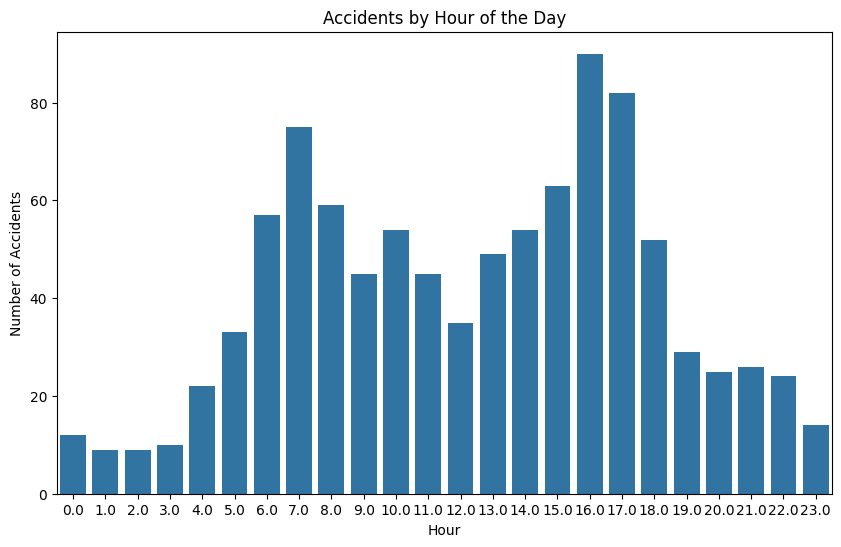

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the number of accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


Accidents by Hour of the Day

The bar graph shows the distribution of accidents across different hours of the day. A few key observations:

There is a significant spike in accidents between 7:00 AM and 8:00 AM, likely due to morning rush hour traffic.
Another large peak occurs between 3:00 PM and 6:00 PM, corresponding to the afternoon rush hour.
The lowest number of accidents happens between midnight and 5:00 AM, when traffic is generally minimal.

*Accidents by Weather Conditions*

C:\Users\varun\AppData\Local\Temp\ipykernel_9600\4291649168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_Condition', data=df, palette='Set2')


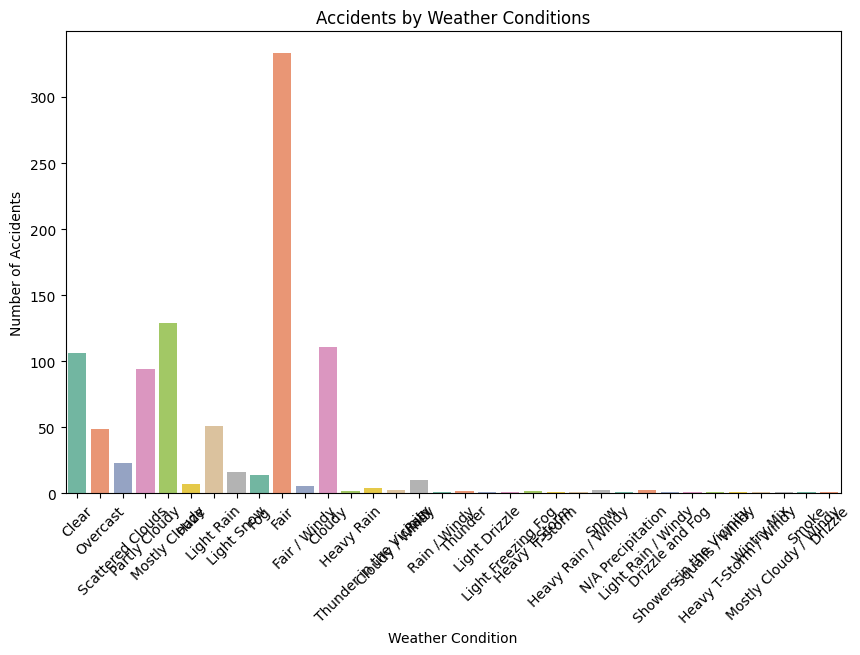

In [10]:
# Plot accidents by weather condition with a different palette
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', data=df, palette='Set2')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()



Accidents by Weather Conditions

This bar chart illustrates how various weather conditions influence the number of accidents:

"Fair" weather conditions account for the majority of accidents, possibly due to increased traffic volumes on clear days.
Light rain, overcast, and mostly cloudy conditions also contribute to a noticeable number of accidents.
Severe weather conditions like heavy rain or snow result in fewer accidents, which may be because drivers are more cautious or avoid driving.

*Visualize Accident Hotspots*

In [12]:
import folium
from folium.plugins import HeatMap

# Create a base map centered on the USA
m = folium.Map(location=[37.0, -95.0], zoom_start=4)  # Centered on the continental US

# Prepare data for the heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]

# Add the heatmap layer
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file
m.save('us_accident_hotspots.html')


 #Severity Prediction

 
*Assuming the dataset has a Severity variable, we can predict accident severity using machine learning.*

In [15]:
#Preparing the Data for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
labelencoder = LabelEncoder()
df['Weather_Condition_Encoded'] = labelencoder.fit_transform(df['Weather_Condition'])


# Features and target
X = df[['Hour', 'Weather_Condition_Encoded']]
y = df['Severity']  # Assuming 'Severity' is a column in the dataset

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\Users\varun\AppData\Local\Temp\ipykernel_9600\2403785601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Condition_Encoded'] = labelencoder.fit_transform(df['Weather_Condition'])


#Training a Classification Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7661016949152543
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.80      0.95      0.87       234
           3       0.25      0.07      0.10        46
           4       0.00      0.00      0.00        13

    accuracy                           0.77       295
   macro avg       0.26      0.25      0.24       295
weighted avg       0.67      0.77      0.70       295



C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

The Decision Tree classifier yielded an overall accuracy of 76.61%. Here's the detailed performance for each class:

Class 1:

Precision: 0.00, Recall: 0.00, F1-score: 0.00, Support: 2
This class performed very poorly with no accurate predictions made.
Class 2:

Precision: 0.80, Recall: 0.95, F1-score: 0.87, Support: 234
The model performed best for this class, which constitutes the majority of the data.
Class 3:

Precision: 0.25, Recall: 0.07, F1-score: 0.10, Support: 46
This class performed poorly, indicating the model had difficulty correctly classifying these instances.
Class 4:

Precision: 0.00, Recall: 0.00, F1-score: 0.00, Support: 13
No correct classifications were made for this class.
Macro and Weighted Averages
Macro avg: Precision (0.26), Recall (0.25), F1-score (0.24)
The macro average suggests poor performance across all classes, especially minority ones.
Weighted avg: Precision (0.67), Recall (0.77), F1-score (0.70)
Weighted average metrics are higher due to the dominance of Class 2 in the dataset.


*Combine Factors in a Heatmap*

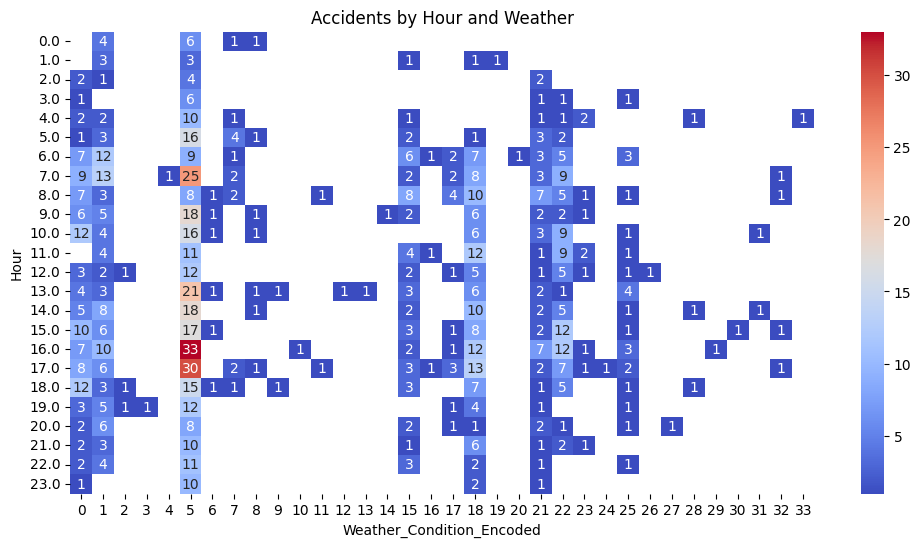

In [18]:
# Group by hour, weather, and road condition
grouped = df.groupby(['Hour', 'Weather_Condition_Encoded']).size().reset_index(name='Accident_Count')

# Pivot table for heatmap visualization
pivot_data = grouped.pivot_table(index='Hour', columns='Weather_Condition_Encoded', values='Accident_Count', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True)
plt.title('Accidents by Hour and Weather')
plt.show()


The heatmap provides a detailed breakdown of accidents across hours of the day and weather conditions:

The hour with the most accidents under "Fair" weather conditions is 5:00 PM.
There is a notable concentration of accidents between 6:00 AM and 9:00 AM under various weather conditions.
Weather conditions that show higher accident counts during rush hour periods (morning and afternoon) are primarily fair or lightly adverse, such as light rain or cloudy skies.

#Conclusion

Accidents by Hour of the Day:

The highest number of accidents occurs during rush hour (7:00 AM - 8:00 AM, 3:00 PM - 6:00 PM), suggesting that traffic congestion contributes significantly to accident rates.
The least accidents occur during late night and early morning hours (12:00 AM - 5:00 AM).

Accidents by Weather Conditions:

Most accidents happen during fair weather, possibly due to higher traffic volumes, while severe weather conditions show fewer accidents, potentially due to reduced driving.

Accidents by Hour and Weather (Heatmap):

There is a clear relationship between specific hours of the day and accident-prone weather conditions, especially during rush hour with fair or lightly adverse weather conditions.

Decision Tree Classifier Performance:

The model performs reasonably well for the majority class (Class 2), but struggles with minority classes (1, 3, and 4), leading to poor precision, recall, and F1-scores for those.
The overall accuracy of 76.61% is decent but highlights the need for better handling of imbalanced data.